In [1]:
# Import dependencies
from matplotlib import pyplot as plt
from scipy.stats import linregress
from scipy.stats import describe
import numpy as np
from sklearn import datasets
import pandas as pd

In [11]:
# List of character names from the American version of "The Office", "Mad Men" and 'Parks and Recreation'
office_names = ['Jim', 'Pam', 'Dwight', 'George', 'Angela', 'Leslie', 'Tom', 'Creed', 'Oscar', 'Don', 'Pete', 'Peggy', 'Joan', 'Roger', 'Ron']

In [12]:
# Generate additional unique fictional character names
num_additional_names = 185
remaining_names = list(set(office_names) ^ set([]))
fictional_names = office_names + np.random.choice(remaining_names, size=num_additional_names, replace=True).tolist()

In [37]:
# Generate fictional DataFrame
data = {
    'First_Name': fictional_names,
    'Last_Name': np.random.choice(['Smith', 'Johnson', 'Brown', 'Anderson', 'Wilson', 'Martin', 'Carter', 'Black'], size=200),
    'Department': np.random.choice(['Sales', 'Marketing', 'Warehouse', 'Accounting', 'Human Resources'], size=200),
    'Average_Daily_Sales': np.random.randint(500, 4000, size=200),
    'Sex': np.random.choice(['Male', 'Female'], size=200),
    'Salary': np.random.randint(40000, 100000, size=200)
}

df = pd.DataFrame(data)
df

,First_Name,Last_Name,Department,Average_Daily_Sales,Sex,Salary
0,Jim,Smith,Marketing,3034,Female,41472
1,Pam,Smith,Accounting,3628,Male,91714
2,Dwight,Carter,Sales,1214,Female,49081
3,George,Carter,Marketing,2999,Male,84269
4,Angela,Black,Warehouse,2329,Female,94887
...,...,...,...,...,...,...
195,Jim,Johnson,Accounting,1719,Male,84376
196,George,Smith,Warehouse,3204,Male,95242
197,Roger,Brown,Warehouse,2076,Male,55780
198,Pam,Wilson,Warehouse,2126,Female,54217


In [38]:
# Find the summary statistics
df.describe()

,Average_Daily_Sales,Salary
count,200.000000,200.00000
mean,2239.350000,69819.22000
std,995.578056,17531.60966
min,527.000000,40383.00000
25%,1374.000000,54270.25000
50%,2204.000000,69946.00000
75%,3034.000000,86282.50000
max,3991.000000,99262.00000


In [39]:
# Find the average salary
df["Salary"].mean()

69819.22

In [40]:
# Find the minimum Average Daily Sales
print(df[df.Average_Daily_Sales == df.Average_Daily_Sales.max()])

   First_Name Last_Name Department  Average_Daily_Sales     Sex  Salary
91     Angela    Wilson      Sales                 3991  Female   82265


In [41]:
# Find the maximum Average Daily Sales
print(df[df.Average_Daily_Sales == df.Average_Daily_Sales.min()])

    First_Name Last_Name Department  Average_Daily_Sales     Sex  Salary
199      Peggy     Smith  Warehouse                  527  Female   62762


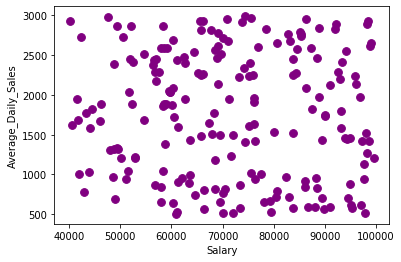

In [19]:
# Draw a scatter plot and here size of dots determined by age of person
# df.plot.scatter(x = 'Salary', y = 'Average_Daily_Sales', s = 'Salary', c = 'green')

df.plot.scatter(x='Salary', y='Average_Daily_Sales', s=60, c='purple')

The r-squared is: 0.0029430497172654594
The correlation coefficient confirms a very weak negative correlation
There seems to be no relationship between how much each employee makes for the company and how much each employee makes for themselves


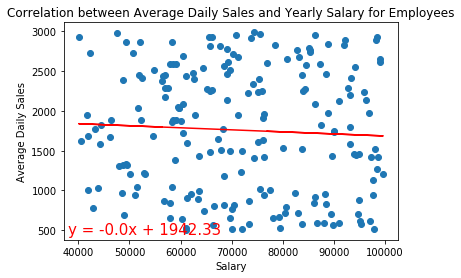

In [20]:
# Add the linear regression equation and line to plot
x_values = df['Salary']
y_values = df['Average_Daily_Sales']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(38000,450),fontsize=15,color="red")
plt.title('Correlation between Average Daily Sales and Yearly Salary for Employees')
plt.xlabel('Salary')
plt.ylabel('Average Daily Sales')
print(f"The r-squared is: {rvalue**2}")
print(f"The correlation coefficient confirms a very weak negative correlation"
"\nThere seems to be no relationship between how much each employee makes for the company and how much each employee makes for themselves")
# plt.tight_layout()
plt.show()

In [43]:
# Let's try to invert the correlation by adding some rows targeted at higher sales and higher salary
# Define the new row to be added
data = [{'First_Name': 'Michael', 'Last_Name': 'Scott', 'Department': 'Sales', 'Average_Daily_Sales': 4041, 'Sex': 'M', 'Salary': 120000},
                   {'First_Name': 'Paul', 'Last_Name': 'Kinsey', 'Department': 'Marketing', 'Average_Daily_Sales': 6003, 'Sex': 'M', 'Salary': 190000},
                   {'First_Name': 'Ken', 'Last_Name': 'Cosgrove', 'Department': 'Marketing', 'Average_Daily_Sales': 5989, 'Sex': 'M', 'Salary': 194000},
                   {'First_Name': 'Bert', 'Last_Name': 'Cooper', 'Department': 'Marketing', 'Average_Daily_Sales': 7382, 'Sex': 'M', 'Salary': 220000},
                   {'First_Name': 'Lane', 'Last_Name': 'Price', 'Department': 'Accounting', 'Average_Daily_Sales': 1033, 'Sex': 'M', 'Salary': 180000}]
                       
df1 = pd.DataFrame(data)
# append df1 using concat since df.append is being rolled out with the new version
mm_df = pd.concat([df, df1])
mm_df

,First_Name,Last_Name,Department,Average_Daily_Sales,Sex,Salary
0,Jim,Smith,Marketing,3034,Female,41472
1,Pam,Smith,Accounting,3628,Male,91714
2,Dwight,Carter,Sales,1214,Female,49081
3,George,Carter,Marketing,2999,Male,84269
4,Angela,Black,Warehouse,2329,Female,94887
...,...,...,...,...,...,...
0,Michael,Scott,Sales,4041,M,120000
1,Paul,Kinsey,Marketing,6003,M,190000
2,Ken,Cosgrove,Marketing,5989,M,194000
3,Bert,Cooper,Marketing,7382,M,220000


In [45]:
# Recalculating the average salary with the outliers included
# Find the average salary
mm_df["Salary"].mean()

72526.06829268293

The r-squared is: 0.10322493560935413
The correlation coefficient confirms a very weak negative correlation
There seems to be no relationship between how much each employee makes for the company and how much each employee makes for themselves


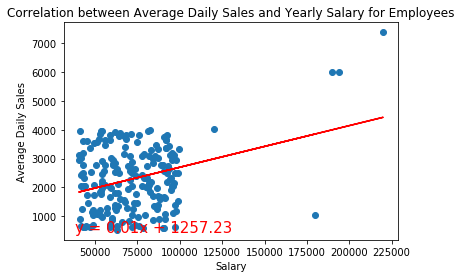

In [44]:
# Let's try another linear regression with the new outliers
# Add the linear regression equation and line to plot
# The linear regression shows 
x_values = mm_df['Salary']
y_values = mm_df['Average_Daily_Sales']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(38000,450),fontsize=15,color="red")
plt.title('Correlation between Average Daily Sales and Yearly Salary for Employees')
plt.xlabel('Salary')
plt.ylabel('Average Daily Sales')
print(f"The r-squared is: {rvalue**2}")
print(f"The correlation coefficient confirms a very weak negative correlation"
"\nThere seems to be no relationship between how much each employee makes for the company and how much each employee makes for themselves")
# plt.tight_layout()
plt.show()